In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("TIDES.csv")

C:\Users\rcpay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
cleanuptype = (df['Cleanup_Type']=='Land (beach, shoreline and inland)')

In [20]:
cleanup_beach = np.sum(df['Cleanup_Type']=='Land (beach, shoreline and inland)')/len(df)
cleanup_underwater = np.sum(df['Cleanup_Type']=='Underwater')/len(df)
cleanup_watercraft = np.sum(df['Cleanup_Type']=='Watercraft (powerboat, sailboat, kayak or canoe)')/len(df)
print(cleanup_beach)
print(cleanup_underwater)
print(cleanup_watercraft)
print(cleanup_beach+cleanup_underwater+cleanup_watercraft)

0.9623248702083778
0.02741625773415831
0.01024109238318754
0.9999822203257236


Note: The cleanup types to not add up to one since this is part of a total of three years. There are totaling rows in the data.

In [90]:
df_underwater = df.loc[df['Cleanup_Type']=='Underwater']
df_underwater = df_underwater.loc[df_underwater['Pounds']> 0.0]
df_underwater = df_underwater.loc[df_underwater['Pounds']< 500.0]
# Dont care about the ones where weight was 0. It seems like anything with a really high weight is inaccurate.
avglb = np.mean(df_underwater[:]['Pounds'])
stdlb = np.std(df_underwater[:]['Pounds'])
print("Average Poundage pulled from underwater: %s, Std. Dev.: %s" % (avglb,stdlb))
print(np.max(df_underwater[:]['Pounds']),np.min(df_underwater[:]['Pounds']))
print("Number of records with greater than 0lb and underwater: %d" % (len(df_underwater)));

Average Poundage pulled from underwater: 49.57517407459537, Std. Dev.: 90.863275874379
497.2 0.01
Number of records with greater than 0lb and underwater: 1421


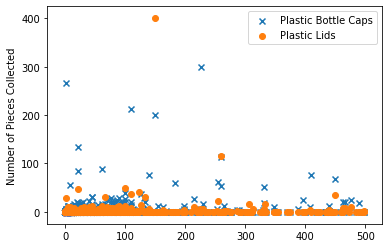

In [165]:
plt.scatter(df_underwater[:]['Pounds'],df_underwater[:]['Bottle_Caps__Plastic_'], label="Plastic Bottle Caps", marker='x');
plt.scatter(df_underwater[:]['Pounds'],df_underwater[:]['Lids__Plastic_'], label="Plastic Lids", marker='o');

plt.ylabel("Number of Pieces Collected");
plt.legend()
plt.show()

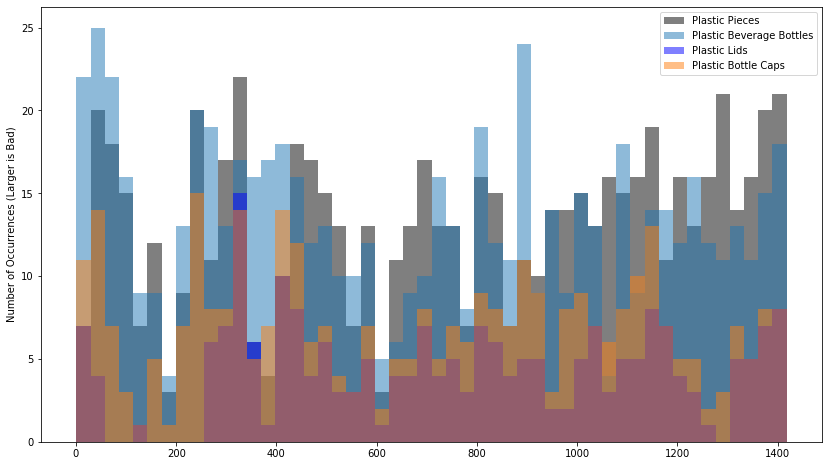

In [139]:
plt.rcParams['figure.figsize'] = (14,8)
plt.hist(df_underwater[:]['Plastic_Pieces'].to_numpy().nonzero(), label="Plastic Pieces", alpha = 0.5, bins = 50,color='k');
plt.hist(df_underwater[:]['Beverage_Bottles__Plastic_'].to_numpy().nonzero(), label="Plastic Beverage Bottles", alpha = 0.5, bins = 50, stacked = True);
plt.hist(df_underwater[:]['Lids__Plastic_'].to_numpy().nonzero(), label="Plastic Lids", bins = 50, alpha = 0.5,color='b',stacked=True);
plt.hist(df_underwater[:]['Bottle_Caps__Plastic_'].to_numpy().nonzero(), label="Plastic Bottle Caps", alpha = 0.5, bins = 50,stacked=True);
plt.ylabel("Number of Occurrences (Larger is Bad)")
plt.legend()
plt.show()

In [140]:
nz_avg_pp = np.mean(df_underwater[:]['Plastic_Pieces'].to_numpy().nonzero())
avg_pp = np.mean(df_underwater[:]['Plastic_Pieces'])
nz_std_pp = np.std(df_underwater[:]['Plastic_Pieces'].to_numpy().nonzero())
std_pp = np.std(df_underwater[:]['Plastic_Pieces'])

In [141]:
print("Nonzero Average: %.2f\nNonzero Std. Dev.: %.2f\nZero Avg: %.2f\nZero Std. Dev: %.2f" % (nz_avg_pp,nz_std_pp,avg_pp,std_pp))

Nonzero Average: 753.37
Nonzero Std. Dev.: 424.60
Zero Avg: 12.93
Zero Std. Dev: 45.85


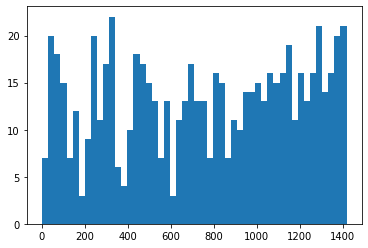

In [150]:
plt.rcParams['figure.figsize'] = (6,4)
plt.hist(df_underwater[:]['Plastic_Pieces'].to_numpy().nonzero(),bins=50)
plt.show()

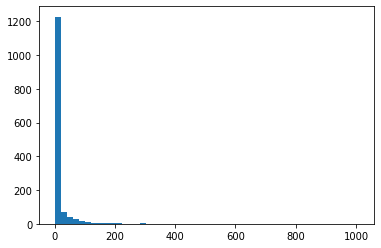

In [166]:
plt.hist(df_underwater[:]['Plastic_Pieces'],bins=50)
plt.show()

In [171]:
gpsdata = df_underwater[:]['GPS'].astype(str)

In [225]:
lons = [];
lats = [];
for i in gpsdata:
    if (',' in i):
        lon = i.split(',')[0]
        lat = i.split(',')[1]
        lon = float(lon)
        lat = float(lat)
        lons.append(lon);
        lats.append(lat);

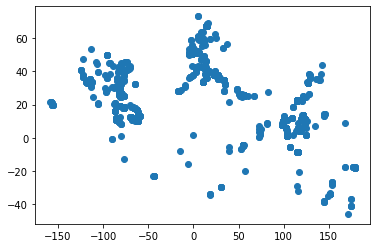

In [239]:
plt.scatter(lats,lons)
plt.show()